In [1]:
import os.path as op
import numpy as np
import matplotlib.pyplot as plt

#Sci-kit Image Imports
from skimage import io
from skimage import filters

%matplotlib inline

*Step 1: Read in the image from the practice file*

In [2]:
im = io.imread('../qdbvcella/data/practice2.tif')

In [3]:
imarray = np.array(im)

*Step 1a: Getting more information about the input image*

In [4]:
imarray.shape

(26, 512, 512)

*Note: In these images the first one is the cells and the other images are all the 

*Step 2: Separate the colors*

In [7]:
#Image of only the cells
cell_ims = imarray[0::2]

__Visualization 1: Original Cell Output__

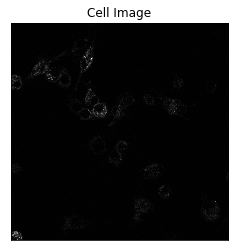

In [8]:
plt.imshow(cell_ims[0], cmap = 'gray')
plt.title('Cell Image')
plt.xticks([])
plt.yticks([])

plt.show()

In [9]:
#Images of the QDs over the time points
qd_ims = imarray[1::2]

__Visualization 2: Quantum Dots__

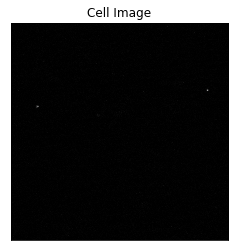

In [10]:
plt.imshow(qd_ims[0], cmap = 'gray')
plt.title('Cell Image')
plt.xticks([])
plt.yticks([])

plt.show()

*Step 3: Separate the time points*

*Step 4: Get centroids for cells*

In [11]:
#Gaussian Filter Inputs
sigma = 7
mode = 'nearest'
cval = 0
truncate = 2.0

In [20]:
gauss = filters.gaussian(cell_ims[0], sigma=sigma, output=None, mode=mode, cval=cval,
                         multichannel=None, preserve_range=False, truncate=truncate)

__Visualization 3: Gaussian Blurred Cells__

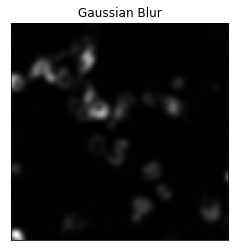

In [21]:
plt.imshow(gauss, cmap = 'gray')
plt.title('Gaussian Blur')
plt.xticks([])
plt.yticks([])

plt.show()

In [22]:
edge_sobel = filters.sobel(gauss)

__Visualization 4: Edge Detector on Cells__

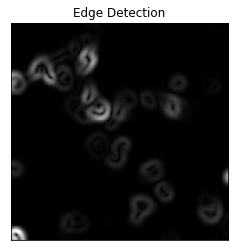

In [23]:
plt.imshow(edge_sobel, cmap = 'gray')
plt.title('Edge Detection')
plt.xticks([])
plt.yticks([])

plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c22e1e278>,
       dtype=object))

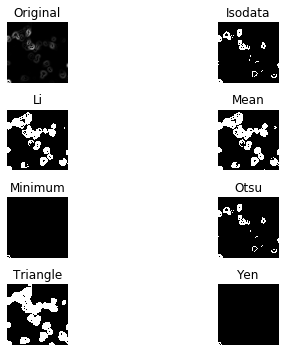

In [24]:
filters.try_all_threshold(edge_sobel)

In [25]:
threshold = filters.threshold_otsu(edge_sobel)
binary = edge_sobel > threshold

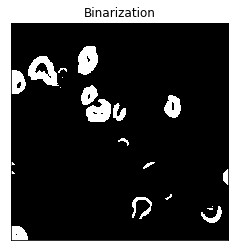

In [26]:
plt.imshow(binary, cmap = 'gray')
plt.title('Binarization')
plt.xticks([])
plt.yticks([])

plt.show()

*Step 5: Get centroids for QD*

*Step 5 To Dos:*
1. Needs a good binarization step with visiibility for rationalization of binarization
    

*Getting a histogram of the values to informt he edge detector that we use*

([array([  0., 455.,  13.,  14.,  10.,   8.,   1.]),
  array([  0., 446.,  14.,  12.,  14.,   8.,   2.]),
  array([  0., 444.,  21.,  18.,   6.,   5.,   6.]),
  array([  0., 450.,  23.,  10.,   7.,   5.,   3.]),
  array([  0., 449.,  15.,  15.,   5.,  10.,   8.]),
  array([  0., 443.,  23.,  12.,   8.,   6.,   1.]),
  array([  0., 448.,  16.,  13.,   8.,   4.,   5.]),
  array([  0., 445.,  20.,  12.,  10.,   4.,   3.]),
  array([  0., 445.,  16.,  14.,  15.,   2.,   4.]),
  array([  0., 446.,  31.,   7.,   8.,   4.,   2.]),
  array([  0., 456.,  19.,  12.,   3.,   2.,   3.]),
  array([  0., 459.,  18.,   8.,   5.,   4.,   3.]),
  array([  0., 449.,  25.,   9.,   3.,   8.,   1.]),
  array([  0., 453.,  16.,  10.,   3.,   4.,   4.]),
  array([  1., 457.,  16.,  10.,   1.,   3.,   0.]),
  array([  1., 454.,  23.,   7.,   5.,   5.,   3.]),
  array([  0., 457.,  22.,   7.,   6.,   3.,   4.]),
  array([  0., 461.,  19.,  10.,   5.,   7.,   4.]),
  array([  0., 461.,  16.,   9.,   7.,   5.,  

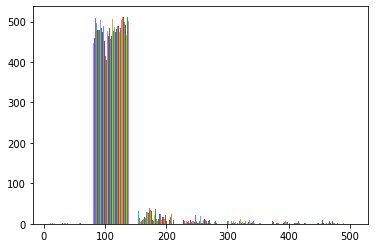

In [280]:
plt.hist(cell_ims[0], bins=7, range=[0,512])